In [1]:
!pip install numpy pandas scikit-learn wandb


In [3]:
import wandb
wandb.login(key="a5dae64b57d6ecde68f01214ec612ea07805af05")

wandb: Currently logged in as: rheasingh012 (rheasingh012-plaksha-university). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

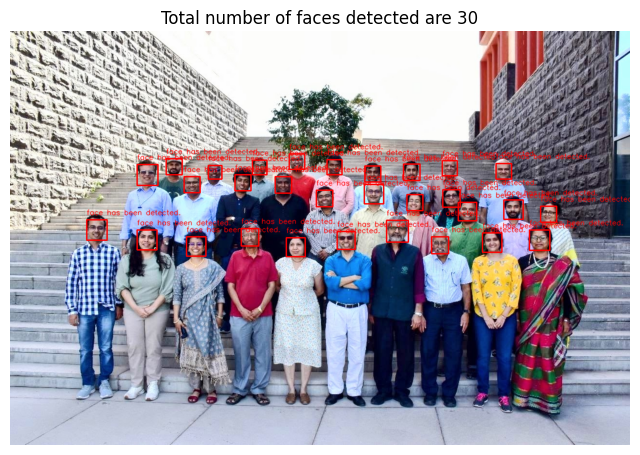

In [3]:
import cv2
import os
import matplotlib.pyplot as plt  # Using Matplotlib for displaying images in Kaggle

# Reading the image plaksha_Faculty.jpg
img = cv2.imread("/kaggle/input/images/Plaksha_Faculty.jpg")  

# Check if image is loaded correctly
if img is None:
    print("Error: OpenCV could not read the image. Check file path or format.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Loading the required haar-cascade xml classifier file
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Applying the face detection method on the grayscale image. 
    # Change the parameters for better detection of faces in your case.
    faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

    # Define the text and font parameters
    text = "face has been detected." 
    font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
    font_scale = 0.5  # Font scale factor
    font_color = (0,0,255)  # Text color in BGR format (here, it's red)
    font_thickness = 1  # Thickness of the text

    # Iterating through rectangles of detected faces
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
        cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    # Display the image and window title should be "Total number of face detected are #"
    plt.figure(figsize=(8, 6))  # Using Matplotlib instead of cv2.imshow()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title(f"Total number of faces detected are {len(faces_rect)}")
    plt.axis("off")  # Hide axis for better visualization
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


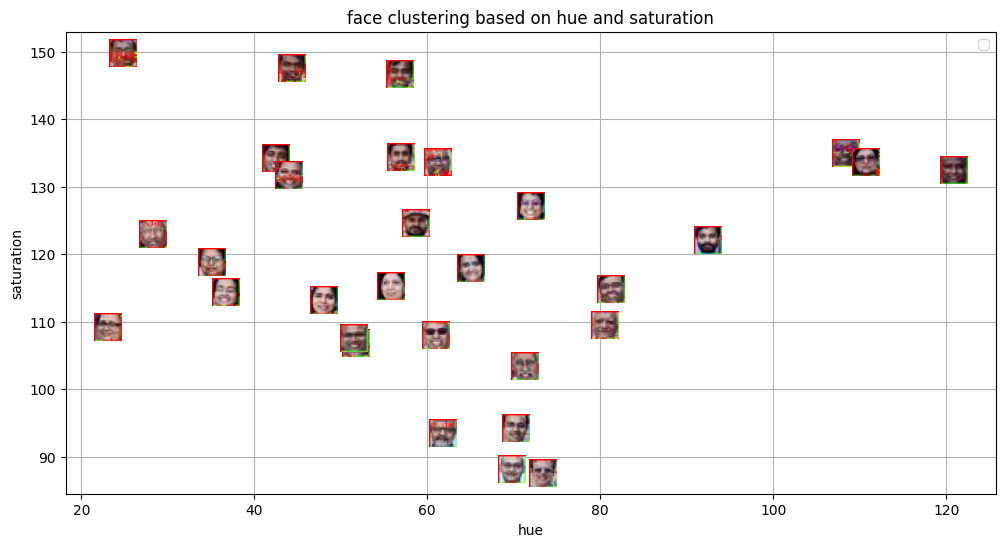

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans=KMeans(n_clusters=3, random_state=42).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel("hue")
plt.ylabel("saturation")
plt.title("face clustering based on hue and saturation") 
plt.grid(True)
plt.legend()
plt.show()

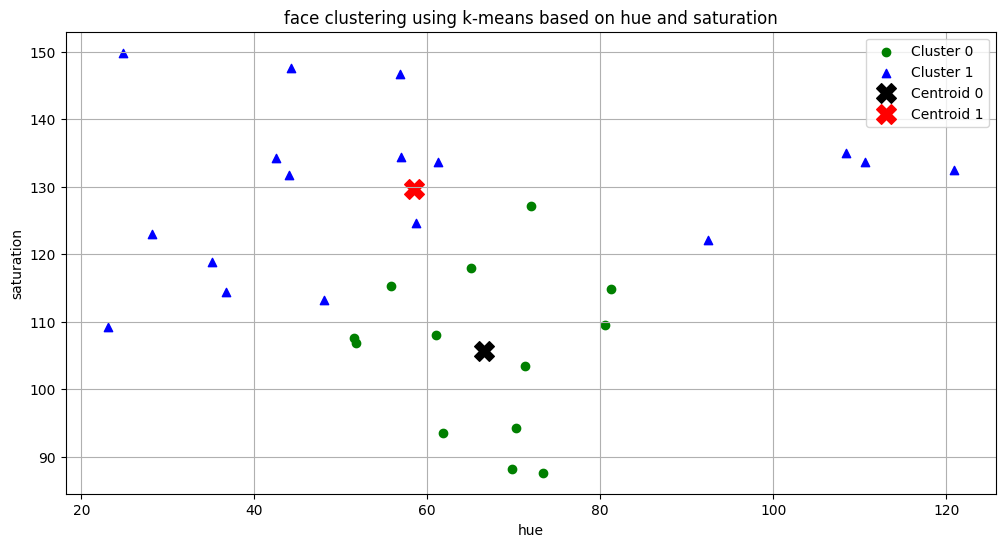

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', marker='o', label="Cluster 0")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', marker='^', label="Cluster 1")

# Calculate centroids)

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points,axis=0)
centroid_1 = np.mean(cluster_1_points,axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='X', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='X', s=200, label="Centroid 1")

plt.xlabel("hue")
plt.ylabel("saturation")
plt.title("face clustering using k-means based on hue and saturation")
plt.legend()
plt.grid(True)
plt.show()

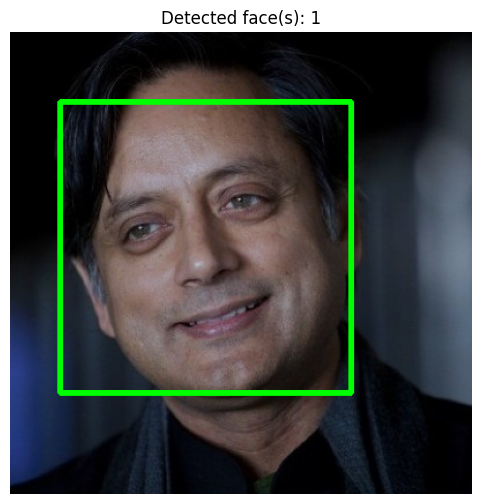

In [6]:
# Read the template image
template_img = cv2.imread("/kaggle/input/images/Dr_Shashi_Tharoor.jpg")

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Load the Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect face(s) in the template image
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Convert BGR image to RGB for correct Matplotlib display
template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(template_img_rgb)
plt.axis("off") 
plt.title(f"Detected face(s): {len(template_faces)}")
plt.show()

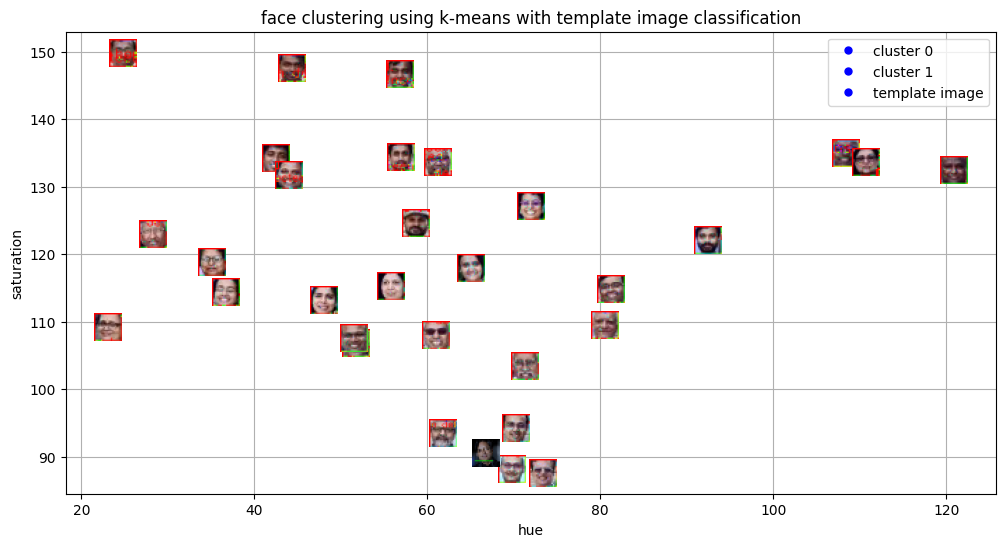

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("hue")
plt.ylabel("saturation")
plt.title("face clustering using k-means with template image classification")
plt.grid(True)
plt.legend(["cluster 0", "cluster 1", "template image"])
plt.show()

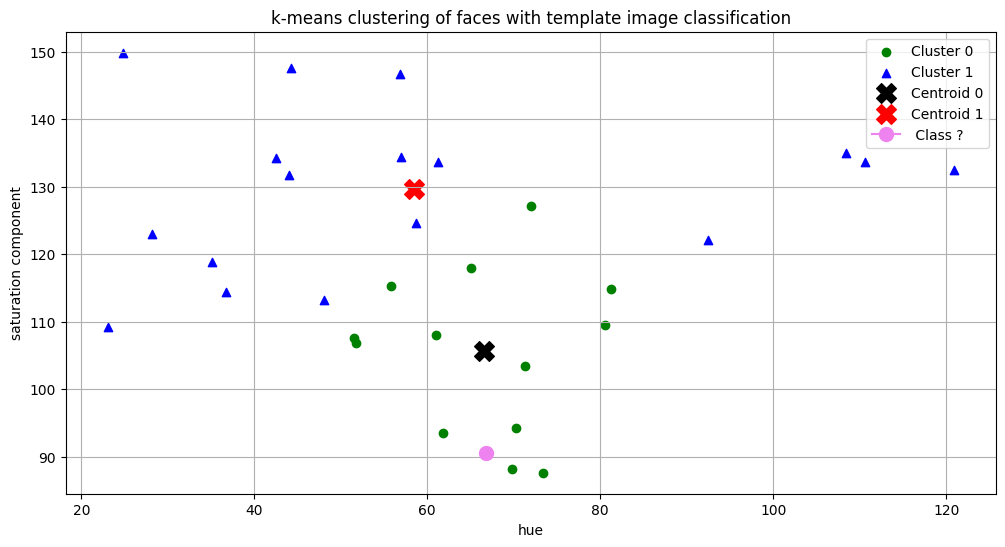

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', marker='o', label="Cluster 0")

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', marker='^', label="Cluster 1")

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='X', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='X', s=200, label="Centroid 1")
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel("hue")
plt.ylabel("saturation component")
plt.title("k-means clustering of faces with template image classification")
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Ans. Common distance metrics used in distance-based classification algorithms include Euclidean distance, Manhattan distance, Minkowski distance, Chebyshev distance, Mahalanobis distance, Cosine Similarity, etc

#### 2. What are some real-world applications of distance-based classification algorithms? 

Ans.
1. Healthcare & Medical Diagnosis → Disease prediction, cancer detection, ECG classification.
2. Recommendation Systems → Movie, music, and product recommendations like Netflix, Amazon.
3. Fraud Detection → Credit card fraud detectio
4. Face recognition (Face ID), OCR (handwriting recognition).
5. Biometric Authentication → Fingerprint, voice recognition
6. Stock Market & Finance → Stock trend analysis, loan approval systems.

#### 3. Explain various distance metrics. 

1. Euclidean Distance– Measures the straight-line distance between two points.
2. Manhattan Distance– Sum of absolute differences between coordinates, used for grid-based problems.
3. Minkowski Distance– Generalized form of Euclidean and Manhattan distances, controlled by a parameter.
4. Chebyshev Distance– Maximum absolute difference along any coordinate axis.
5. Mahalanobis Distance– Accounts for correlations in data and adjusts for different scales.
6. Cosine Similarity– Measures the angle between two vectors, commonly used in text analysis.

#### 4. What is the role of cross validation in model performance? 

Ans. Cross-validation helps evaluate a model’s performance by splitting the dataset into many training and testing sets. It ensures that the model generalizes well to data that it has not seen and reduces the risk of overfitting or underfitting. By training and testing on different subsets of data, it provides a better estimate of the model's accuracy.

#### 5. Explain variance and bias in terms of KNN? 

In KNN: 
1. Low k means low bias, high variance
   The model closely follows the training data, capturing even small 
   fluctuations (including noise).
   This leads to overfitting, meaning it performs well on training data 
   but poorly on new data.  
2. High k means high bias, low variance
   The model generalizes too much, smoothing out patterns in the data.
   This leads to underfitting, where it fails to capture important details
   and relationships.
3. Optimal k balances both to improve accuracy.